In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# General imports

In [11]:
import os
import numpy as np
import pandas as pd
# import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, laplace, gmean
from tqdm.notebook import tqdm
from scipy.stats import gaussian_kde

# Selected assets

In [12]:
asset_list = [
    "DBA",
    "DBB",
    "GLD",
    "USO",
    "URA",
]

# update daily price data

In [13]:
from scripts.update_data import update_daily_price_data_yahoo

price_data = dict()
for ticker in asset_list:
    update_daily_price_data_yahoo(ticker)
    price_data[ticker] = pd.read_pickle(f'./data/daily_price/yahoo_finance/{ticker}.pkl')
    print(ticker)
    display(price_data[ticker])


DBA


,open,high,low,close,adj_close,volume
datetime,,,,,,
2007-01-05,24.930000,25.049999,24.850000,25.020000,21.559395,27800
2007-01-08,25.940001,25.940001,24.840000,24.980000,21.524927,143600
2007-01-09,24.799999,24.820000,24.600000,24.660000,21.249187,136700
2007-01-10,24.700001,24.820000,24.500000,24.730000,21.309505,76600
2007-01-11,24.900000,25.129999,24.799999,25.100000,21.628328,159600
...,...,...,...,...,...,...
2025-01-03,26.430000,26.520000,26.290001,26.490000,26.490000,998700
2025-01-06,26.670000,26.809999,26.389999,26.430000,26.430000,587100
2025-01-07,26.480000,26.559999,26.430000,26.500000,26.500000,374300


DBB


,open,high,low,close,adj_close,volume
datetime,,,,,,
2007-01-05,24.100000,24.100000,23.299999,23.709999,18.858980,184600
2007-01-08,34.110001,34.110001,23.389999,23.389999,18.604450,10200
2007-01-09,22.900000,23.389999,22.900000,23.270000,18.509005,4700
2007-01-10,23.549999,24.219999,23.549999,24.219999,19.264633,10900
2007-01-11,24.049999,24.850000,24.049999,24.540001,19.519163,116100
...,...,...,...,...,...,...
2025-01-03,18.530001,18.580000,18.520000,18.549999,18.549999,37800
2025-01-06,18.639999,18.730000,18.570000,18.570000,18.570000,195800
2025-01-07,18.670000,18.700001,18.610001,18.660000,18.660000,220200


GLD


,open,high,low,close,adj_close,volume
datetime,,,,,,
2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001,5992000
2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999,11655300
2004-11-22,44.750000,44.970001,44.740002,44.950001,44.950001,11996000
2004-11-23,44.880001,44.919998,44.720001,44.750000,44.750000,3169200
2004-11-24,44.930000,45.049999,44.790001,45.049999,45.049999,6105100
...,...,...,...,...,...,...
2025-01-03,244.559998,244.820007,243.360001,243.490005,243.490005,4872100
2025-01-06,242.330002,243.789993,242.050003,243.190002,243.190002,3758900
2025-01-07,245.520004,245.770004,243.809998,244.559998,244.559998,5090300


USO


,open,high,low,close,adj_close,volume
datetime,,,,,,
2006-04-10,546.000000,548.000000,541.359985,544.159973,544.159973,484738
2006-04-11,546.559998,547.119995,538.400024,545.599976,545.599976,162138
2006-04-12,545.760010,550.479980,542.479980,542.719971,542.719971,156038
2006-04-13,540.000000,551.919983,539.200012,550.559998,550.559998,70088
2006-04-17,553.599976,559.200012,549.440002,558.320007,558.320007,114713
...,...,...,...,...,...,...
2025-01-03,77.410004,78.220001,77.260002,77.919998,77.919998,1875300
2025-01-06,78.430000,78.900002,77.059998,77.300003,77.300003,2141800
2025-01-07,78.129997,78.440002,77.699997,78.169998,78.169998,3912400


URA


,open,high,low,close,adj_close,volume
datetime,,,,,,
2010-11-05,103.440002,103.440002,99.480003,103.260002,69.925407,48233
2010-11-08,104.699997,114.779999,103.919998,114.779999,77.726479,255017
2010-11-09,116.160004,119.519997,109.800003,111.000000,75.166740,334967
2010-11-10,111.959999,113.099998,108.000000,112.739998,76.345055,121967
2010-11-11,114.000000,114.120003,111.120003,113.699997,76.995140,111767
...,...,...,...,...,...,...
2025-01-03,28.480000,28.900000,28.110001,28.840000,28.840000,3251000
2025-01-06,29.120001,30.049999,29.120001,29.280001,29.280001,2744300
2025-01-07,29.610001,29.670000,28.080000,28.209999,28.209999,2928100


# Returns on individual assets

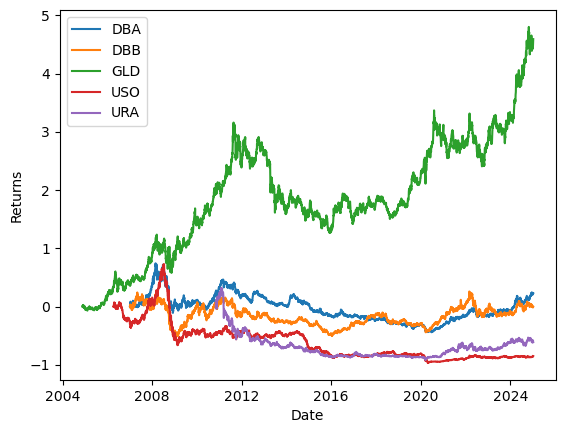

In [14]:
for ticker in price_data:
    df = price_data[ticker]
    plt.plot(df.index, df['adj_close'] / df['adj_close'].iloc[0] - 1, label=ticker)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Equal weight allocation

In [15]:
from scripts.fixed_weight_allocation import backtest_fixed_weight_portfolio

equal_weights = dict()
for ticker in asset_list:
    equal_weights[ticker] = 0.20

pf, metrics = backtest_fixed_weight_portfolio(
    tickers=list(price_data.keys()),
    dataframes=price_data,
    rebalance_days=252,
    weights=equal_weights,
    initial_capital=1000000,
    plot=False,
)

display(pf)

2010-11-08T00:00:00, BUY EXECUTED, Ticker: DBA, Price: 30.36, Size: 6611, Cost: 3305.50, Commission: 0.00
2010-11-08T00:00:00, BUY EXECUTED, Ticker: DBB, Price: 23.73, Size: 8385, Cost: 4192.50, Commission: 0.00
2010-11-08T00:00:00, BUY EXECUTED, Ticker: GLD, Price: 135.92, Size: 1479, Cost: 739.50, Commission: 0.00
2010-11-08T00:00:00, BUY EXECUTED, Ticker: USO, Price: 299.44, Size: 668, Cost: 334.00, Commission: 0.00
2010-11-08T00:00:00, BUY EXECUTED, Ticker: URA, Price: 104.70, Size: 1933, Cost: 966.50, Commission: 0.00
2011-11-07T00:00:00, SELL EXECUTED, Ticker: DBA, Price: 30.78, Size: -572, Cost: 286.00, Commission: 0.00
2011-11-07T00:00:00, BUY EXECUTED, Ticker: DBB, Price: 19.72, Size: 980, Cost: 490.00, Commission: 0.00
2011-11-07T00:00:00, SELL EXECUTED, Ticker: GLD, Price: 172.85, Size: -397, Cost: 198.50, Commission: 0.00
2011-11-07T00:00:00, SELL EXECUTED, Ticker: USO, Price: 293.84, Size: -31, Cost: 15.50, Commission: 0.00
2011-11-07T00:00:00, BUY EXECUTED, Ticker: URA, P

,portfolio_value,asset_values,asset_weights,cash,weight_cash,total_cumulative_returns,pnl,drawdown,price_DBA,daily_returns_DBA,...,weight_USO,pnl_USO,cumulative_pnl_USO,price_URA,daily_returns_URA,cumulative_returns_URA,value_URA,weight_URA,pnl_URA,cumulative_pnl_URA
datetime,,,,,,,,,,,,,,,,,,,,,
2010-11-05,1.000000e+06,"{'DBA': 0.0, 'DBB': 0.0, 'GLD': 0.0, 'USO': 0....","{'DBA': 0.0, 'DBB': 0.0, 'GLD': 0.0, 'USO': 0....",1.000000e+06,1.000000,0.000000,0.000000,0.000000,30.330000,NaN,...,0.000000,0.000000,0.000000,103.260002,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2010-11-08,1.024413e+06,"{'DBA': 203023.80394744873, 'DBB': 198305.2468...","{'DBA': 0.19818549804620664, 'DBB': 0.19357938...",1.014875e+06,0.990689,0.024413,24413.016840,0.000000,30.709999,0.012529,...,0.195781,-641.294678,-641.294678,114.779999,0.111563,0.111563,221869.737640,0.216582,22268.153511,22268.153511
2010-11-09,1.014858e+06,"{'DBA': 204147.674451828, 'DBB': 200736.904478...","{'DBA': 0.2011589203453514, 'DBB': 0.197798084...",1.005320e+06,0.990602,0.014858,14857.676216,0.009328,30.879999,0.005536,...,0.195097,-2565.117554,-3206.412231,111.000000,-0.032933,0.074956,214563.000000,0.211422,-7306.737640,14961.415871
2010-11-10,1.024951e+06,"{'DBA': 203817.12949562073, 'DBB': 200066.1051...","{'DBA': 0.19885554828824045, 'DBB': 0.19519583...",1.015413e+06,0.990694,0.024951,24950.680281,0.000000,30.830000,-0.001619,...,0.198337,5290.568970,2084.156738,112.739998,0.015676,0.091807,217926.415871,0.212621,3363.415871,18324.831741
2010-11-11,1.023408e+06,"{'DBA': 199189.424451828, 'DBB': 201743.095521...","{'DBA': 0.19463344152705017, 'DBB': 0.19712870...",1.013870e+06,0.990680,0.023408,23408.017086,0.001505,30.129999,-0.022705,...,0.197592,-1068.804077,1015.352661,113.699997,0.008515,0.101104,219782.094101,0.214755,1855.678230,20180.509972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-03,8.324836e+05,"{'DBA': 169588.9785346985, 'DBB': 154131.94366...","{'DBA': 0.2037144998843304, 'DBB': 0.185147125...",8.209836e+05,0.986186,-0.167516,-167516.408351,0.254519,26.490000,-0.004884,...,0.219023,2316.595001,-48285.284004,28.840000,0.025969,-0.720705,151900.280804,0.182466,3844.907589,-143467.615632
2025-01-06,8.329278e+05,"{'DBA': 169204.86195373535, 'DBB': 154298.1274...","{'DBA': 0.20314470462137502, 'DBB': 0.18524791...",8.214278e+05,0.986193,-0.167072,-167072.248971,0.254122,26.430000,-0.002265,...,0.217164,-1450.788574,-49736.072578,29.280001,0.015257,-0.716444,154217.763617,0.185151,2317.482813,-141150.132819
2025-01-07,8.314581e+05,"{'DBA': 169653.0, 'DBB': 155045.93873214722, '...","{'DBA': 0.20404274666458758, 'DBB': 0.18647474...",8.199581e+05,0.986169,-0.168542,-168541.872851,0.255438,26.500000,0.002648,...,0.219996,2035.788574,-47700.284004,28.209999,-0.036544,-0.726806,148582.065178,0.178701,-5635.698439,-146785.831258


## Cumulative Returns

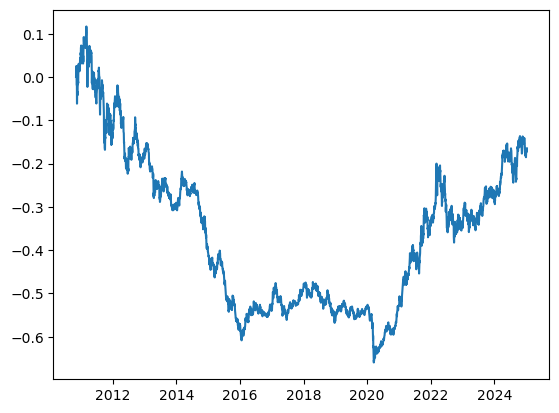

In [16]:
plt.plot(pf.index, pf['total_cumulative_returns'])
plt.show()

## Single asset pnl

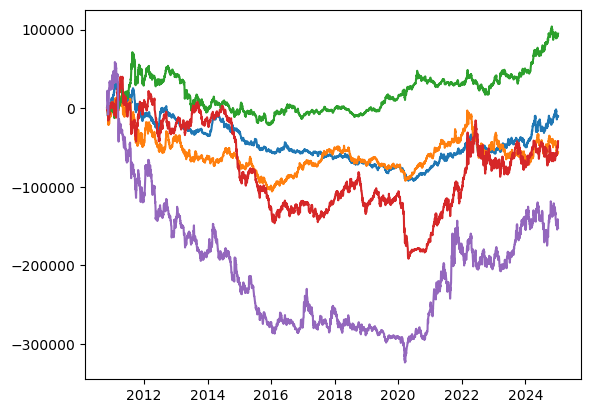

In [17]:
for ticker in price_data:
    plt.plot(pf.index, pf[f'cumulative_pnl_{ticker}'])
plt.show()

## Metrics

In [18]:
metrics

{'sharpe_ratio': -0.004535280349669273,
 'volatility': 0.15493726575989242,
 'cagr': -0.012650878614266059,
 'max_drawdown': 0.6950548906860833}